# TP3 : Ensemble methods and feature selection

In this lab, we are going to explore the performances of different ensemble methods and feature selection methods, in different datasets. 

Objectives :

 - Investigate the performances of different ensemble methods
 - Investigate the influence of the hyperparameters of the models and of the data characteristics
 - Visualize the boundary decisions methods
 - Report correctly the results
 - Analyze and discuss results on an applicative dataset



In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import sklearn

# Part 1 : Ensemble methods on toy dataset 

## Subpart 1 : dataset generation

In this first part, you are going to evaluate the performances of ensemble methods.

First, by using the [make_classification](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_classification.html) function, generate a dataset of 100 points with 2 informative features. Also, by using the [train_test_split](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) function, split your dataset in a training and a test set by putting 67% of data's in training and 33% of data's in test. 

You can use random_state = 123 in order to fix the randomness.

    Q1 : quickly explain why we separate the training set from the test set.
    
 ##### Nous séparons l'ensemble d'entraînement de l'ensemble de test pour évaluer la capacité du modèle à généraliser.Sinon le model risque de faire du overfitting.

In [322]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a dataset with 100 samples, 2 informative features, and fix the randomness with random_state=123
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=123)

# Split the dataset into a training set (67%) and a test set (33%) with random_state=123 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

# Output the shapes of the resulting splits to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((67, 2), (33, 2), (67,), (33,))

## Subpart 2 : model evaluation

Now, apply different ensemble methods on this dataset. The ensemble methods you will evaluate are :
 - decision tree with max depth = 3
 - random forest with 3 estimators
 - adaboost classifier with 20 estimators
 - bagging classifier with 10 estimators. 

For each model, train in on the training dataset and evaluate it on the test dataset. Also, use the [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) in order to plot the boundary decisions.

    Q2 : briefly explain each model , and the hyperparameters used.       
##### Un arbre de décision avec une profondeur maximale de 3: signifie que l’arbre peut se diviser en branches jusqu’à trois niveaux de profondeur. Dans un arbre de décision, chaque nœud correspond à une question ou un critère de séparation qui divise les données en sous-ensembles de plus en plus petits.
        
##### La forêt aléatoire est un ensemble d’arbres de décision, chacun entraîné sur un sous-ensemble aléatoire des données (tirage avec remise) et des caractéristiques. 3 estimateurs signifie que le modèle utilise trois arbres, et combine leurs décisions(Vote de majorité) pour la classification finale.

##### AdaBoost entraîne des arbres de décision successifs en se concentrant sur les instances mal classées précédemment. 20 estimateurs indique 20 arbres faibles( comme des arbres de profondeur 1) combinés pour renforcer le modèle global.

##### Bagging crée plusieurs arbres de décision, chacun entraîné sur un échantillon aléatoire des données.10 estimateurs signifie que 10 arbres sont utilisés, en moyennant leurs prédictions pour plus de stabilité et de précision.
        
    Q3 : Also, analyze and explain the differences between each boundary decision

##### Arbre de décision a des frontières plus simples et linéaires, contraintes par ses trois niveaux de division.

##### Forêt aléatoire crée des frontières plus flexibles, mais avec seulement trois arbres, elles peuvent être moins lissées.

##### AdaBoost produit des frontières plus complexes en se concentrant sur les points difficiles à classer, ce qui affine les frontières près des points mal classés.

##### Bagging lisse les frontières en moyenne les prédictions de plusieurs arbres entraînés sur des sous-ensembles différents, mais l'effet est limité avec 10 estimateurs.  

    Q4 : Finally, report both training and test accuracy in a tabular and discuss them

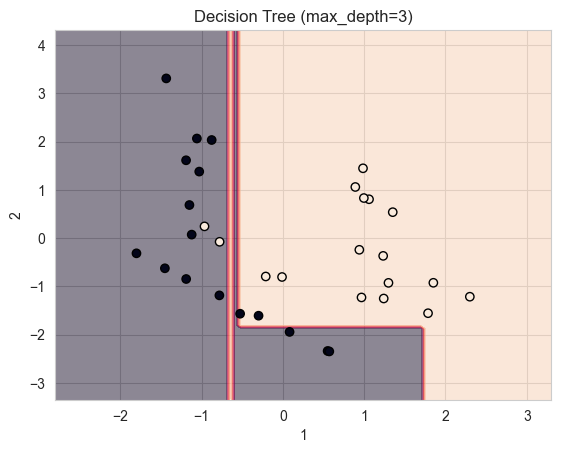

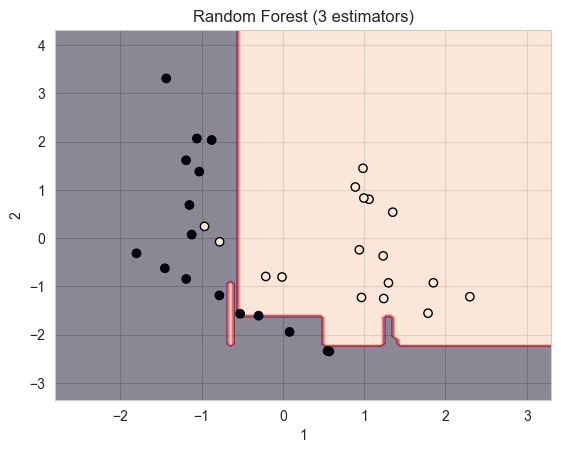

/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


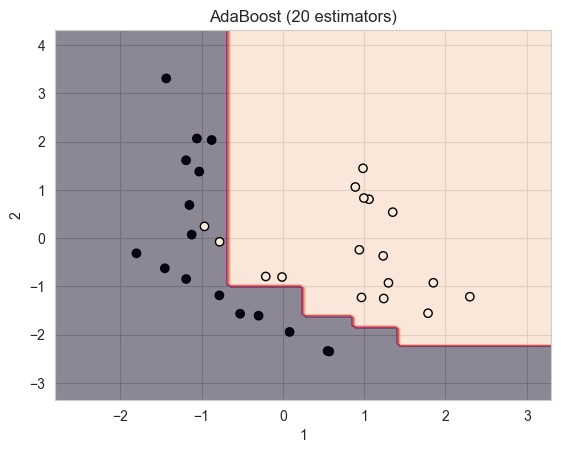

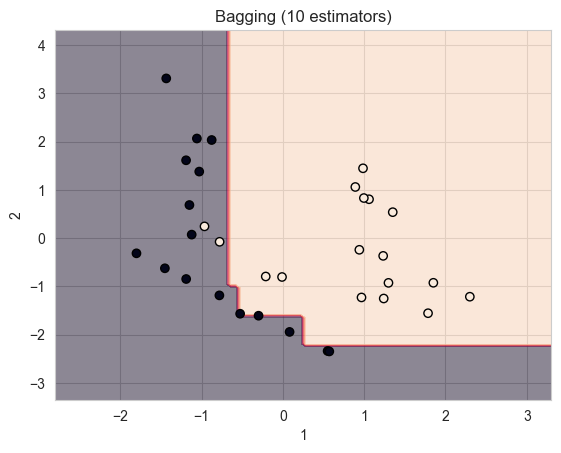

,Model,Train Accuracy,Test Accuracy
0,Decision Tree (max_depth=3),0.985075,0.909091
1,Random Forest (3 estimators),1.000000,0.909091
2,AdaBoost (20 estimators),1.000000,0.939394
3,Bagging (10 estimators),1.000000,0.909091


In [323]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd

# Define the models with specified hyperparameters
dt_model = DecisionTreeClassifier(max_depth=3, random_state=123)
rf_model = RandomForestClassifier(n_estimators=3, random_state=123)
ab_model = AdaBoostClassifier(n_estimators=20, random_state=123)
bagging_model = BaggingClassifier(n_estimators=10, random_state=123)

# Train each model and calculate both training and test accuracies
models = {
    'Decision Tree (max_depth=3)': dt_model,
    'Random Forest (3 estimators)': rf_model,
    'AdaBoost (20 estimators)': ab_model,
    'Bagging (10 estimators)': bagging_model
}

results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    results['Model'].append(name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    
    # For decision boundary display
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X_test, response_method="predict",
        xlabel='1', ylabel='2',alpha=0.5)

    disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
    plt.title(name)
    plt.show()

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df




## Subpart 3 : make blobs

Repeat previous exercises, by replacing the dataset with [make blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)  with 500 samples, two
classes (thus two centers) in the input parameters and random state = 123.

    Q5 : In which of the two datasets is the usage of ensembles more beneficiary, and why?
    Q6 : When might a single model yield better performance than an ensemble?
       * Il vaut mieux utiliser les méthode d'ensemble avec make_classification


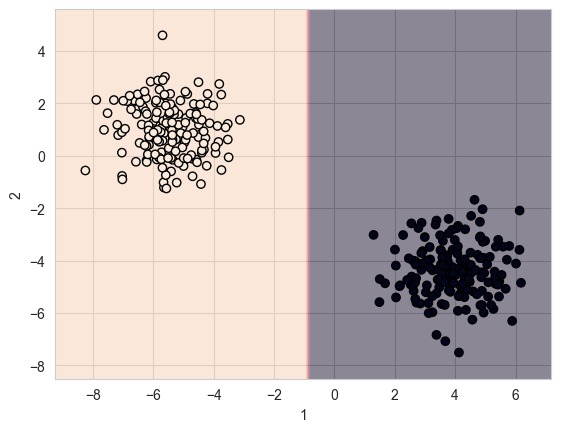

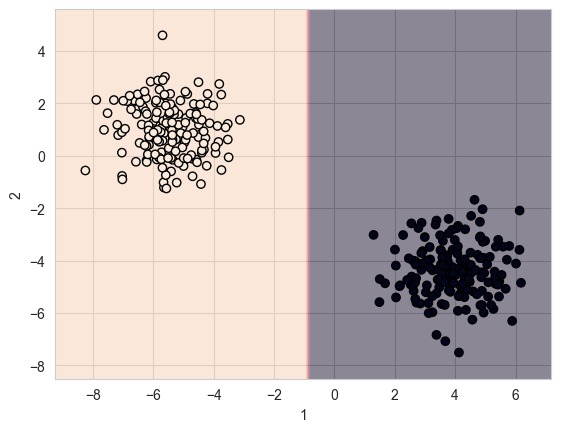

/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


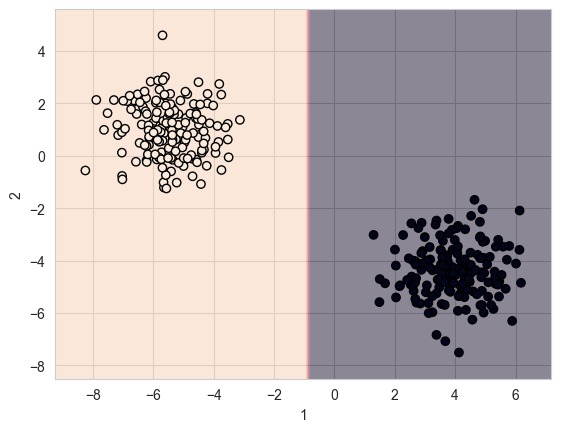

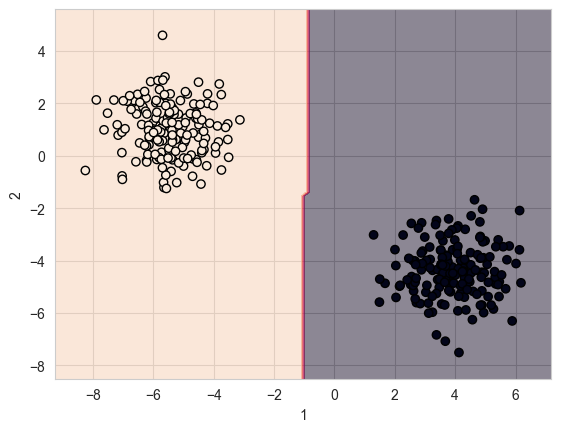

,Model,Train Accuracy,Test Accuracy
0,Decision Tree (max_depth=3),1.0,1.0
1,Random Forest (3 estimators),1.0,1.0
2,AdaBoost (20 estimators),1.0,1.0
3,Bagging (10 estimators),1.0,1.0


In [324]:
# Re-import necessary libraries after code execution reset
from sklearn.datasets import make_blobs

# Generate a dataset with 500 samples, 2 classes, and fix the randomness with random_state=123
X, y = make_blobs(n_samples=500, centers=2, random_state=123)

# Split the dataset into a training set (67%) and a test set (33%) with random_state=123 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

# Define the models with specified hyperparameters
dt_model = DecisionTreeClassifier(max_depth=3, random_state=123)
rf_model = RandomForestClassifier(n_estimators=3, random_state=123)
ab_model = AdaBoostClassifier(n_estimators=20, random_state=123)
bagging_model = BaggingClassifier(n_estimators=10, random_state=123)

# Train each model and calculate both training and test accuracies
models = {
    'Decision Tree (max_depth=3)': dt_model,
    'Random Forest (3 estimators)': rf_model,
    'AdaBoost (20 estimators)': ab_model,
    'Bagging (10 estimators)': bagging_model
}

results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    results['Model'].append(name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

    # For decision boundary display
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X_train, response_method="predict",
        xlabel='1', ylabel='2',alpha=0.5)

    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
    #plt.legend('Model : ',model)
    plt.show()

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df


# Part 2 : Feature selection on toy dataset

In this second part, you are going to evaluate different feature selection methods. First, by using once again the [make classification](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_classification.html) function, compute a dataset with 100 samples, 10 features with 2 informative and 2 redundant. Split your dataset in training and test.

Then, apply different feature selection methods in order to find back which features are informatives. The methods you will aply are the following :
 - By using the feature importance reported by the different classifiers
 - Principal Component Analysis
 - Variance Threshold
 - Recursive Feature Elimination
 
For each feature selection method, use the 2 best selected features, and train a new model using only those features. The model you will use are the ones evaluated in the previous part.

    Q7 : For each feature selection method, briefly explain how they work
    
##### feature importance for each classifier : Cette méthode consiste à utiliser des modèles d’apprentissage supervisé pour évaluer l’importance relative des features dans le dataset. Ces modèles, après leur entraînement, attribuent une mesure d’importance à chaque feature, indiquant sa contribution à la prédiction. Vous avez exploré cette méthode avec plusieurs classifiers : Decision Tree Classifier, AdaBoost, Bagging, et Random Forest.
##### PCA :  Les composantes principales sont triées en fonction de la variance. Les premières composantes sont retenues, car elles capturent la majeure partie de l'information des données d'origine, permettant ainsi de réduire le nombre de caractéristiques tout en préservant  les données essentielles. 

##### Variance Threshold : sélectionne les caractéristiques qui ont une variance supérieure à un certain seuil. L'idée est que les caractéristiques avec une faible variance ne contiennent pas d'informations utiles. En fixant un seuil de variance, on élimine les caractéristiques avec une variance trop faible

##### RFE est une méthode itérative qui entraîne un modèle et élimine les caractéristiques les moins importantes en fonction de leur poids. À chaque itération, une ou plusieurs caractéristiques sont supprimées, et le modèle est réévalué avec les caractéristiques restantes. Ce processus est répété jusqu'à ce qu'un certain nombre de caractéristiques soit atteint.

    Q8 : Report the results you obtain in a tabular. Analyze and discuss the results you obtain.
    
Dans notre make_classification on a choisi n_informative = 2 et n_redundunt = 2 (combinaison des 2 n_informative). Cela veut dire que dans nos feature selection on devrait voir apparaître 4 features qui contribuent le plus. Ainsi, pour chaque méthode on regardera les 4 features les plus importantes. Normalement, on devrait voir les même features apparaître plusieurs fois.
    
##### Feature importance pour chaque modele : 
* Decision tree classifier : Les features 2, 4, 6 et 8 ont le plus de contribution
* Random Forrest Classifier : Les features 6, 7, 0 et 8 ont le plus de contribution
* Adaboost : Les features 2, 4, 6 et 8 ont le plus de contribution
* Bagging : Les features 2, 6, 4 et 8 ont le plus de contribution

##### PCA1 : Les features Feature 8, Feature 6 et Feature 7  et feature 0 ont les contributions (valeur absolue) les plus élevées,Les autres features. On regarde la valeur des coefficients des premier principal component car cela suffit. On effet, on affichant le variance_explained on s'apercoit que les 2 premiers possède le plus d'information. Ainsi, les coefficients avec les plus hautes valeurs sont les features les plus importantes (le rang du coefficieny = features). 

##### Variance Threshold : En appliquant le Variance Treshold on liste les features par ordre décroissant des variances. Dans notre cas pour deux n_informative et 2 n_redundant, on en a gardé 4 que sont les features 6, 7,3 et 8 qui ont le plus de contribution avec cette méthode.

##### RFE : Avec cette méthode à la fin on ne garde seulement les features 6, 7 et 8.

#### Conclusion :
Avec toutes les méthodes de sélection de features appliquées (PCA, Variance Threshold, Random Forest, RFE), nous constatons que les features 6, 7 et 8 apparaissent de manière récurrente dans chaque méthode. Cela suggère fortement que :
	1.	Les deux features informatives (définies par n_informative=2 lors de la génération du dataset) font partie de ces trois features.
	2.	Une feature redondante (issue de n_redundant=2) est également incluse, car elle est fortement corrélée aux features informatives et contribue indirectement à la prédiction.

Cependant, il y a quand même des limitations. En effet, toutes les méthodes ne trouvent pas les mêmes features qui contribuent le plus. Par exemple, le variance threshold ne prend pas en comtpe le lien avec la cible ce qui est le cas avec le feature importance qui prend en compte la prédiction pour décider pour la sélection, cependant il peut surestimer l'importance de certaines features.

In [325]:
# Generate a dataset with 100 samples, 2 informative features, and fix the randomness with random_state=123
X, y = make_classification(n_samples=100, n_features=10, n_informative=2, n_redundant=2,random_state=123)

# Split the dataset into a training set (67%) and a test set (33%) with random_state=123 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

1. Feature importance for each classifier

In [326]:
def get_top_feature_importances(feature_importances, top_n=2):
    # Get indices of the top N important features
    top_indices = np.argsort(feature_importances)[-top_n:]  # Select top N indices with the highest importance values
    # Get importance values of the top N features
    top_importances = feature_importances[top_indices]
    # Display the results
    print("Indices of top two important features:", top_indices)
    print("Importance values of top two features:", top_importances)

    #return top_indices, top_importances

In [327]:
from sklearn.feature_selection import VarianceThreshold, RFE

dt_model = DecisionTreeClassifier(max_depth=3, random_state=123)
rf_model = RandomForestClassifier(n_estimators=3, random_state=123)
ab_model = AdaBoostClassifier(n_estimators=20, random_state=123)
bagging_model = BaggingClassifier(n_estimators=15, random_state=123)

# Using feature importance from Decision Tree
dt_model.fit(X_train, y_train)
dt_feature_importances = dt_model.feature_importances_

# Using feature importance from Random Forest
rf_model.fit(X_train, y_train)
rf_feature_importances = rf_model.feature_importances_

# Using feature importance from AdaBoost
ab_model.fit(X_train, y_train)
ab_feature_importances = ab_model.feature_importances_

# Using feature importance from Bagging
bagging_model.fit(X_train, y_train)
# Retrieve feature importances from each decision tree and compute their average
bagging_feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)

# Print all important features
print("Decision Tree :\n", dt_feature_importances)
get_top_feature_importances(dt_feature_importances, top_n=4)

print("\nRandom Forest :\n", rf_feature_importances)
get_top_feature_importances(rf_feature_importances, top_n=4)

print("\nAdaBoost Forest :\n", ab_feature_importances)
get_top_feature_importances(ab_feature_importances, top_n=4)

print("\nBagging Forest :\n", bagging_feature_importances)
get_top_feature_importances(bagging_feature_importances, top_n=4)


/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Decision Tree :
 [0.         0.         0.0589011  0.         0.15145997 0.
 0.22024984 0.         0.5693891  0.        ]
Indices of top two important features: [2 4 6 8]
Importance values of top two features: [0.0589011  0.15145997 0.22024984 0.5693891 ]

Random Forest :
 [0.12977967 0.04124981 0.01737101 0.06693992 0.06019293 0.01329365
 0.09258154 0.10816076 0.44147902 0.02895169]
Indices of top two important features: [6 7 0 8]
Importance values of top two features: [0.09258154 0.10816076 0.12977967 0.44147902]

AdaBoost Forest :
 [0.   0.   0.1  0.05 0.1  0.   0.3  0.   0.45 0.  ]
Indices of top two important features: [2 4 6 8]
Importance values of top two features: [0.1  0.1  0.3  0.45]

Bagging Forest :
 [0.03422562 0.00321617 0.04751683 0.00754591 0.12951426 0.01005937
 0.09718024 0.01436577 0.63963291 0.01674293]
Indices of top two important features: [2 6 4 8]
Importance values of top two features: [0.04751683 0.09718024 0.12951426 0.63963291]


2. Principal Component analysis

Variance expliquée par chaque composante principale :
[0.36466071 0.15743047]


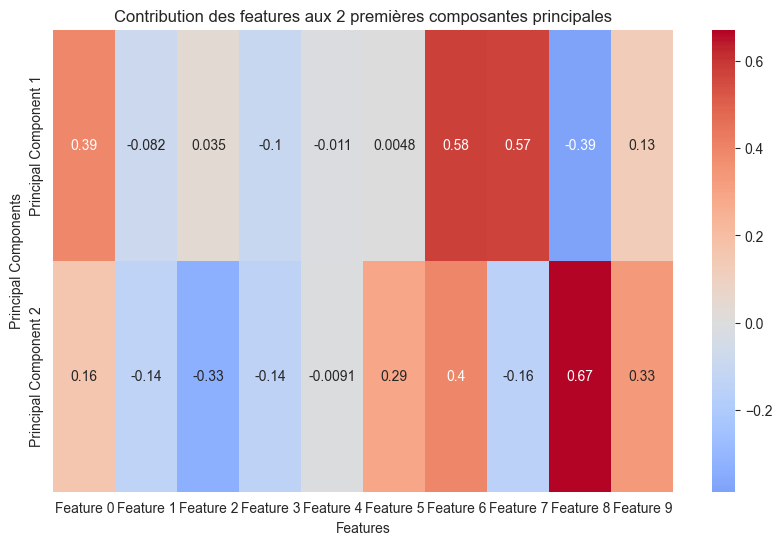

In [328]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialisation de la PCA avec 2 composantes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Afficher la variance expliquée par chaque composante principale
print("Variance expliquée par chaque composante principale :")
print(pca.explained_variance_ratio_)

# Récupérer les loadings (contributions) des features dans les 2 premières composantes
loadings = pca.components_

# Créer un DataFrame pour visualiser les loadings
feature_importance_df = pd.DataFrame(loadings, columns=[f"Feature {i}" for i in range(X_train.shape[1])])
feature_importance_df.index = [f"Principal Component {i+1}" for i in range(2)]

# Visualiser les contributions sous forme de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance_df, annot=True, cmap='coolwarm', center=0)
plt.title("Contribution des features aux 2 premières composantes principales")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()

3. Variance treshold

In [329]:
import numpy as np

# Initialiser une liste pour stocker les variances des features
feature_variances = []

# Calculer la variance de chaque feature
for i in range(X.shape[1]):
    feature_values = X[:, i]
    feature_variance = np.var(feature_values)
    feature_variances.append((i, feature_variance))  # Stocker l'indice et la variance

# Trier les features par variance décroissante
feature_variances_sorted = sorted(feature_variances, key=lambda x: x[1], reverse=True)

# Sélectionner les 2 features avec la plus grande variance
top_2_features = feature_variances_sorted[:4]

# Affichage des résultats
print("Les 2 features avec la plus grande variance sont :")
for feature in top_2_features:
    print(f"Feature {feature[0]} avec une variance de {feature[1]}")

Les 2 features avec la plus grande variance sont :
Feature 6 avec une variance de 1.9310572048786165
Feature 8 avec une variance de 1.8331363734951878
Feature 7 avec une variance de 1.7459512457276967
Feature 3 avec une variance de 1.2246180875074584


4. Recursive feature Elimination

In [330]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # Peut être remplacé par d'autres modèles
from sklearn.linear_model import LogisticRegression  # Exemple alternatif
from sklearn.model_selection import train_test_split

# Choix du modèle (exemple avec RandomForest, peut être changé selon vos besoins)
model = RandomForestClassifier(random_state=42)

# Initialisation de RFE
n_features_to_select = 3  # Nombre de features à conserver (ajustez selon vos besoins)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Ajuster le RFE sur les données d'entraînement
rfe.fit(X_train, y_train)

# Afficher les résultats de la sélection des features
print("Features sélectionnées :")
for i in range(X.shape[1]):
    print(f"Feature {i}: {'Sélectionnée' if rfe.support_[i] else 'Éliminée'}")

# Réduire X_train et X_test aux features sélectionnées
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Vérification : dimensions après réduction
print(f"Nombre de features sélectionnées : {X_train_selected.shape[1]}")


Features sélectionnées :
Feature 0: Éliminée
Feature 1: Éliminée
Feature 2: Éliminée
Feature 3: Éliminée
Feature 4: Éliminée
Feature 5: Éliminée
Feature 6: Sélectionnée
Feature 7: Sélectionnée
Feature 8: Sélectionnée
Feature 9: Éliminée
Nombre de features sélectionnées : 3


# Part 3 application on a real dataset

You now have knowledge of different feature selection and ensemble methods. You are now going to apply them on a real dataset, another dataset extracted from Kaggle : [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data).
 
First, read the given csv by using pandas and analyze the dataset.

    Q9 : Describe the task proposed in this dataset.
 
Then, apply the different ensemble methods and feature selection methods previously seen on this dataset. You may keep only the numerical values for simplicity, but you can extend it to non-numerical values if you have time.  
 
    Q10 : Report the results in a tabular and propose an in-depth analysis.

In [331]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/student-alcohol-consumption")

print("Path to dataset files:", path)

# Charger le dataset
df = pd.read_csv("/Users/jaheergoulam/.cache/kagglehub/datasets/uciml/student-alcohol-consumption/versions/2/student-por.csv")

# Explorer les premières lignes
print(df.head())

# Description du dataset
print("Colonnes du dataset :", df.columns)
print("Types de données :", df.dtypes)
print("Statistiques descriptives :", df.describe())

Path to dataset files: /Users/jaheergoulam/.cache/kagglehub/datasets/uciml/student-alcohol-consumption/versions/2
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13

Le dataset “Student Alcohol Consumption” fournit des informations sur divers attributs personnels, sociaux et académiques des étudiants, ainsi que leurs niveaux de consommation d’alcool. Le but est de prédire les notes des élève en se basant de leur consommation d'alcool.

La variable cible : 

* G1 : grade 1
* G2 : grade 2
* G3 : grade 3

Il y a en tout 30 features en tout (sexe, school, age,...)



In [332]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Charger les données
target = 'Dalc'
X = df.drop(columns=['Dalc'])
y = df[target]

# Encodage et standardisation
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialiser les modèles
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=123),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=123),
    "AdaBoost": AdaBoostClassifier(n_estimators=20, random_state=123),
    "Bagging": BaggingClassifier(n_estimators=15, random_state=123),
}

# Résultats avant sélection de features
results_before = []

for model_name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)
    # Calculer l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results_before.append({'Model': model_name, 'Accuracy': accuracy})

# Afficher les résultats avant sélection de features
results_before_df = pd.DataFrame(results_before)
print("Accuracy avant sélection de features :")
print(results_before_df)

Accuracy avant sélection de features :
           Model  Accuracy
0  Decision Tree  0.706977
1  Random Forest  0.697674
2       AdaBoost  0.693023
3        Bagging  0.702326


/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### Avec ceci on connait les performances des différents modèles avec ce dataset sans le feature selection.
#### Le but étant de savoir si avec les différentes méthodes de feature selection en terme de performances cela marche vraiment, etsi oui quelles méthodes de feature selection fonctionnent le mieux pour ce dataset.

Feature Importance method

In [333]:
# Fonction pour récupérer les top N features
def get_top_features(feature_importances, feature_names, top_n):
    indices = np.argsort(feature_importances)[-top_n:][::-1]
    return [feature_names[i] for i in indices]

# Sélection de features avec chaque modèle
results_after = []

for model_name, model in models.items():
    # Obtenir les importances des features (pour les modèles qui le permettent)
    model.fit(X_train, y_train)
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
    elif isinstance(model, BaggingClassifier):
        feature_importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    else:
        continue  # Skip models without feature importances

    # Récupérer les 10 meilleures features
    top_features = get_top_features(feature_importances, list(X.columns), top_n=10)

    # Réentraîner le modèle avec les 10 meilleures features
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]
    model.fit(X_train_selected, y_train)
    y_pred_selected = model.predict(X_test_selected)

    # Calculer l'accuracy après sélection de features
    accuracy_selected = accuracy_score(y_test, y_pred_selected)
    results_after.append({'Model': model_name, 'Top Features': top_features, 'Accuracy': accuracy_selected})
    print(top_features)

# Afficher les résultats après sélection de features
results_after_df = pd.DataFrame(results_after)
print("\nAccuracy après sélection de features :")
print(results_after_df)

['Walc', 'G3', 'reason_reputation', 'absences', 'address_U', 'sex_M', 'school_MS', 'G2', 'G1', 'health']
['Walc', 'absences', 'G3', 'G2', 'goout', 'G1', 'age', 'freetime', 'Medu', 'famrel']
['Walc', 'freetime', 'famsup_yes', 'guardian_other', 'reason_other', 'famsize_LE3', 'Pstatus_T', 'G3', 'G1', 'absences']
['Walc', 'absences', 'G3', 'age', 'G1', 'goout', 'freetime', 'G2', 'famrel', 'failures']

Accuracy après sélection de features :
           Model                                       Top Features  Accuracy
0  Decision Tree  [Walc, G3, reason_reputation, absences, addres...  0.706977
1  Random Forest  [Walc, absences, G3, G2, goout, G1, age, freet...  0.730233
2       AdaBoost  [Walc, freetime, famsup_yes, guardian_other, r...  0.679070
3        Bagging  [Walc, absences, G3, age, G1, goout, freetime,...  0.702326


/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


* Variance treshold

In [334]:
# Appliquer la méthode Variance Threshold pour sélectionner les features
selector = VarianceThreshold()  # Par défaut, le seuil est de 0
X_train_transformed = selector.fit_transform(X_train)
X_test_transformed = selector.transform(X_test)

# Obtenir les noms des features sélectionnées
selected_features = X_train.columns[selector.get_support()]

# Calculer la variance de chaque feature sélectionnée
variances = pd.Series(selector.variances_, index=X_train.columns)
selected_variances = variances.loc[selected_features]

# Trier les features par variance décroissante et garder les 10 meilleures
top_10_features = selected_variances.sort_values(ascending=False).head(10).index.tolist()
print("\nTop 10 Features Sélectionnées (Variance Threshold) :")
print(top_10_features)

# Filtrer les données avec ces 10 features
X_train_top_10 = X_train[top_10_features]
X_test_top_10 = X_test[top_10_features]

# Initialiser les modèles
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=123),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=123),
    "AdaBoost": AdaBoostClassifier(n_estimators=20, random_state=123),
    "Bagging": BaggingClassifier(n_estimators=15, random_state=123),
}

# Résultats après sélection des 10 meilleures features
results_after = []

for model_name, model in models.items():
    # Entraîner le modèle avec les 10 meilleures features
    model.fit(X_train_top_10, y_train)
    y_pred = model.predict(X_test_top_10)
    accuracy = accuracy_score(y_test, y_pred)
    results_after.append({'Model': model_name, 'Accuracy': accuracy})

# Afficher les résultats finaux
results_after_df = pd.DataFrame(results_after)
print("\nRésultats après sélection des 10 meilleures features (Variance Threshold) :")
print(results_after_df)


Top 10 Features Sélectionnées (Variance Threshold) :
['guardian_other', 'traveltime', 'internet_yes', 'age', 'Walc', 'failures', 'freetime', 'nursery_yes', 'address_U', 'school_MS']

Résultats après sélection des 10 meilleures features (Variance Threshold) :
           Model  Accuracy
0  Decision Tree  0.716279
1  Random Forest  0.688372
2       AdaBoost  0.688372
3        Bagging  0.674419


/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


* PCA

In [335]:
# Initialisation de la PCA avec toutes les composantes
pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)

# Afficher la variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)

# Récupérer les contributions (loadings) des features
loadings = pca.components_

# Créer un DataFrame pour les contributions
loadings_df = pd.DataFrame(loadings.T, index=X_train.columns, columns=[f"PC{i+1}" for i in range(X_train.shape[1])])

# Sélectionner les 10 features avec les plus grandes contributions absolues (pour PC1 et PC2 combinés)
loadings_df['Absolute Contribution'] = loadings_df.iloc[:, :2].abs().sum(axis=1)  # Somme des valeurs absolues
top_10_features = loadings_df['Absolute Contribution'].sort_values(ascending=False).head(10).index.tolist()

print("\nTop 10 Features Sélectionnées (PCA) :")
print(top_10_features)

# Filtrer les données pour ne garder que ces 10 features
X_train_pca_selected = X_train[top_10_features]
X_test_pca_selected = X_test[top_10_features]

# Réentraîner les modèles avec ces features
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=123),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=123),
    "AdaBoost": AdaBoostClassifier(n_estimators=20, random_state=123),
    "Bagging": BaggingClassifier(n_estimators=15, random_state=123),
}

# Résultats après sélection des 10 meilleures features via PCA
results_pca = []

for model_name, model in models.items():
    # Entraîner le modèle avec les 10 meilleures features
    model.fit(X_train_pca_selected, y_train)
    y_pred = model.predict(X_test_pca_selected)
    accuracy = accuracy_score(y_test, y_pred)
    results_pca.append({'Model': model_name, 'Accuracy': accuracy})

# Afficher les résultats finaux
results_pca_df = pd.DataFrame(results_pca)
print("\nRésultats après sélection des features via PCA :")
print(results_pca_df)

Variance expliquée par chaque composante principale :
[0.1100572  0.06879982 0.05658247 0.04557368 0.04159851 0.04007441
 0.03635941 0.03443772 0.03200264 0.03101202 0.0303057  0.02909252
 0.02769907 0.02644746 0.02551282 0.02455484 0.0233908  0.02240737
 0.02157359 0.02049387 0.01999574 0.01960858 0.01875985 0.01780536
 0.01683858 0.0164473  0.0150664  0.014864   0.01411332 0.01347769
 0.01287113 0.01183876 0.01163694 0.01098035 0.00950896 0.00899205
 0.00699491 0.00406932 0.003866   0.00242117 0.0018677 ]

Top 10 Features Sélectionnées (PCA) :
['Medu', 'G3', 'G2', 'G1', 'Fedu', 'Walc', 'failures', 'school_MS', 'internet_yes', 'traveltime']


/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Résultats après sélection des features via PCA :
           Model  Accuracy
0  Decision Tree  0.711628
1  Random Forest  0.679070
2       AdaBoost  0.655814
3        Bagging  0.665116


* RFE 

In [336]:
# Initialiser le modèle de base pour RFE
base_model = RandomForestClassifier(random_state=42)
n_features_to_select = 10  # Nombre de features à conserver

# Initialiser RFE
rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select)

# Ajuster le RFE sur les données d'entraînement
rfe.fit(X_train, y_train)

# Obtenir les noms des features sélectionnées
selected_features = X_train.columns[rfe.support_]
print("\nFeatures sélectionnées (RFE) :")
print(list(selected_features))

# Réduire X_train et X_test aux 10 features sélectionnées
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Réentraîner les modèles avec les 10 meilleures features
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=123),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=123),
    "AdaBoost": AdaBoostClassifier(n_estimators=20, random_state=123),
    "Bagging": BaggingClassifier(n_estimators=15, random_state=123),
}

# Résultats après sélection avec RFE
results_rfe = []

for model_name, model in models.items():
    # Entraîner le modèle avec les 10 meilleures features
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    results_rfe.append({'Model': model_name, 'Accuracy': accuracy})

# Afficher les résultats finaux
results_rfe_df = pd.DataFrame(results_rfe)
print("\nRésultats après sélection des features via RFE :")
print(results_rfe_df)


Features sélectionnées (RFE) :
['age', 'Medu', 'freetime', 'goout', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Résultats après sélection des features via RFE :
           Model  Accuracy
0  Decision Tree  0.716279
1  Random Forest  0.711628
2       AdaBoost  0.674419
3        Bagging  0.706977


/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Résultats de l'étude : Analyse des méthodes de sélection de features

Nous avons appliqué différentes méthodes de sélection de features sur notre dataset, en utilisant quatre modèles de classification pour évaluer leurs performances avant et après la sélection. L'objectif était de réduire le nombre de features de 30 à 10, en conservant uniquement les plus importantes. 

La cible de notre étude était **`Dalc`** (consommation quotidienne d'alcool).

---

### Features sélectionnées par les différentes méthodes

#### Feature Importance (par les modèles)
- **Decision Tree** : `['Walc', 'G3', 'reason_reputation', 'absences', 'address_U', 'sex_M', 'school_MS', 'G2', 'G1', 'health']`
- **Random Forest** : `['Walc', 'absences', 'G3', 'G2', 'goout', 'G1', 'age', 'freetime', 'Medu', 'famrel']`
- **AdaBoost** : `['Walc', 'freetime', 'famsup_yes', 'guardian_other', 'reason_other', 'famsize_LE3', 'Pstatus_T', 'G3', 'G1', 'absences']`
- **Bagging** : `['Walc', 'absences', 'G3', 'age', 'G1', 'goout', 'freetime', 'G2', 'famrel', 'failures']`

#### PCA
- `['Medu', 'G3', 'G2', 'G1', 'Fedu', 'Walc', 'failures', 'school_MS', 'internet_yes', 'traveltime']`

#### Variance Threshold
- `['guardian_other', 'traveltime', 'internet_yes', 'age', 'Walc', 'failures', 'freetime', 'nursery_yes', 'address_U', 'school_MS']`

#### RFE
- `['age', 'Medu', 'freetime', 'goout', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']`

---

### Analyse des résultats

En comparant les listes de features sélectionnées par chaque méthode, on remarque que certaines features sont récurrentes, quel que soit l'approche utilisée :

- **Features les plus fréquentes** : `Walc`, `G3`, `G2`, `G1`, `absences`.
- **Autres features spécifiques** : En fonction de la méthode, d'autres features sont également sélectionnées, mais elles apparaissent moins souvent (ex. : `freetime`, `goout`, `age`).

---

### Performances après sélection des features

Après avoir entraîné les modèles uniquement avec les 10 features sélectionnées par chaque méthode, les performances restent similaires à celles obtenues en utilisant toutes les features (~0.70 en moyenne). Cela montre que les features sélectionnées sont bien celles qui expliquent le mieux la cible et que les autres features n'apportent que peu d'information supplémentaire.

---

### Conclusion

Cette étude montre qu'il existe une corrélation significative entre la consommation quotidienne d'alcool des étudiants (**`Dalc`**) et leurs performances scolaires (`G1`, `G2`, `G3`). Ces résultats suggèrent que :

1. **Les performances académiques influencent fortement la consommation d'alcool** :
   - Les notes (`G1`, `G2`, `G3`) apparaissent systématiquement parmi les features les plus importantes.
   - Cela pourrait indiquer un lien direct entre la réussite scolaire et les habitudes de consommation.

2. **Autres facteurs potentiellement pertinents** :
   - Des facteurs comme les absences (`absences`), le temps libre (`freetime`), et les relations sociales (`goout`, `famrel`) pourraient également jouer un rôle dans la consommation d'alcool.

---

### Limites et perspectives

Cette étude reste simple et exploratoire. Les résultats doivent être interprétés avec précaution, car d'autres facteurs non inclus dans l'étude pourraient influencer la consommation d'alcool. Pour approfondir, il serait intéressant de :

- Explorer d'autres approches de modélisation (ex. : réseaux neuronaux).
- Étudier l'impact des interactions entre les différentes variables.
- Réaliser une analyse plus poussée sur des sous-groupes spécifiques (ex. : par tranche d'âge ou sexe).

Ces résultats offrent néanmoins une bonne base pour comprendre les liens potentiels entre les habitudes de consommation et les performances académiques.